<a href="https://colab.research.google.com/github/jaeohshin/keras/blob/main/tutorial3_housing_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Housing price prediction using a linear regression method.

From the properties (number of rooms, neighborhood, etc) of house, predict its price.
The data is from Boston area in 1970's, the price is in thousands of dollars.

1. Get the data
2. Prepare the data for the training: 
a) change the scale
b) vectorize
3. build the model-in this case, the number of data is not many (just a few hundreds), so we use K-fold cross-validation. In simple words, take the training data randomly and average over it.
4. Validate the model
5. use the model to predict the price from a new (unknow) data.

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_target), (test_data, test_target) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
train_target[0]

15.2

In [19]:
## Normalize the input data
mean = train_data.mean(axis=0)
print(mean)
train_data-=mean
std=train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]


In [20]:
# build ML model
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = "relu"),
        layers.Dense(64, activation = "relu"),                          
        layers.Dense(1),                              
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [21]:
#Below I use k-fold validation.
#This is necessary as the number of data is not many
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_target[i * num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]], 
         axis=0)
    
    partial_train_targets = np.concatenate(
        [train_target[:i * num_val_samples],
         train_target[(i+1) * num_val_samples:]], 
         axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs= num_epochs, batch_size = 16, verbose =0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [25]:
np.mean(all_scores)

2.284358710050583

In [26]:
num_epochs = 500
all_mae_histories = []
for i in range(k) :
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_target[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]], 
         axis=0)
    
    partial_train_targets = np.concatenate(
        [train_target[:i * num_val_samples],
         train_target[(i+1) * num_val_samples:]], 
         axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)   

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [29]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range (num_epochs)]

(2.0, 3.5)

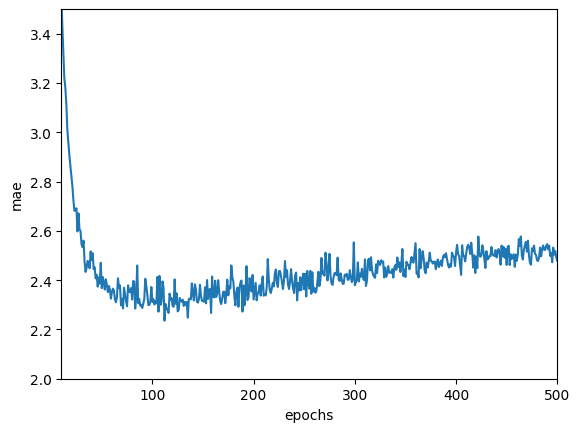

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history) 
plt.xlabel("epochs")
plt.ylabel("mae")
plt.xlim(10,500)
plt.ylim(2,3.5)

In [37]:
model = build_model()
model.fit(train_data, train_target,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score=model.evaluate(test_data, test_target)

4/4 [==============================] - 0s 4ms/step - loss: 17.9863 - mae: 2.6712


In [39]:
predictions=model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


In [41]:
len(predictions)

102